# Over Lapping Generational Model

Imports and set magics:

In [69]:
# (i) Import the following packages
import numpy as np
import scipy as sp
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
import ipywidgets as widgets
import scipy.optimize as optimize

# (ii) autoreload modules when code is run
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Introduction to the model

The paper examines an Over Lapping Generational model (OLG model), which is a long run growth model that accounts for consumer preferences. The agents live for two periods: t and t+1, while the government has infitnite horizons.

The OLG model presents two ways frameworks:

The first framework is based on private savings, so that all generations save for their own retirement. This framework is called 'fully funded'.

The second framework is a 'pay-as-you-go system' (payg), which indicates, that the young generation pays for the old generation's retirement. The major challenge with this system occurs, when the young generation is smaller than the old generation - this is the case in the danish system.

In this paper, only the fully funded framework is analyzed

# Model description

### Population


Population is given by: 

$ 
\begin{equation}
(1) L_t=L_{t-1}(1+n)
\end{equation}
$

$L_t$ denotes the current young generation

$L_{t-1}$ is the old generation who are still alive in the current period

$n$ = growth rate

In [70]:
# (i) Defining the two generations in alive in period t
[LY_t, LO_t] = sm.symbols('L_t L_t-1')

# (ii) Defining growth rate of population
n = sm.symbols('n')

# (iii) Defining equation (1):
LY_t = LO_t*(1+n)

### Budget contraint for the young and old generation (BC)

As described in the introduction, only the young generation work, while the old generation is retired. Therefore, a share of the wage ($w_t$) is used when the agents are young ($c_{1t}$) and a part of the salery is saved for the retirement ($s_t$). The old generation consume ($c_{2t+1}$) their savings when they are old:

$ 
\begin{equation}
(2) c_{1t} + s_t = w_t
\end{equation} $

$ 
\begin{equation}
(3) c_{2t+1} = (1+r_{t+1})s_t
\end{equation} $





In [71]:
# (i) Defining the parameters
[w_t, s_t, r_t1, rho, c_1t, c_2t1] = sm.symbols('w_t s_t r_{t+1} rho c_{1t} c_{2t+1}')

# (ii) Defining the parameters
# (ii.a) Budget constraint for the young generation
BC_Y = c_1t + s_t - w_t 
Y_help = sm.Eq(c_1t + s_t - w_t, 0)

# (ii.b) Budget constraint for the old generation
BC_O = (1 + r_t1) * s_t - c_2t1
O_help = sm.Eq((1 + r_t1) * s_t - c_2t1, 0) 

### Intertemporal budget constraint (IBC)

The intertemporal budget constraint is relevant to examines, because the equation consist of the consumption in period $t$ and $t+1$ for the same agent. Therefore, IBC can be defined as the lifetime budget constraint. IBC is found by substituting out the saving rate:

$
\begin{equation}
(3^*) s_t = c_{2t+1} / (1+r_{t+1})
\end{equation} $

$ (3^*) \rightarrow (2)$

$\begin{equation}
  IBC (4): c_{1t} + c_{2t+1} / (1+r_{t+1}) = w_t 
\end{equation} $ 

In [72]:
# (i) Defining equation (3*)
BC_Y_S = sm.solve(BC_Y, s_t) [0]

# (ii) Substitution out saving rate in equation (2):
IBC_1 = BC_O.subs(s_t, BC_Y_S)

# (iii) Defining IBC (equation (4)) by isolating w_t
IBC_2 = sm.solve(IBC_1, w_t) [0]
IBC = (c_1t + c_2t1 / (1+r_t1) - w_t)

# (iv) Visualizing IBC (equation (4))
IBC

c_{1t} + c_{2t+1}/(r_{t+1} + 1) - w_t

#### Consumer preferences

The agents maximizes their utility from their consumption:


$
\begin{equation} 
(5) U_t = u(c_{1t}) + \frac{1}{1+{\rho}}  u(c_{2t+1})
\end{equation}$

In [73]:
# (i) Defining utility for young generation
U_Y = sm.log(c_1t)

# (ii) Defining utility for old generation
U_O = sm.log(c_2t1)

# (i) Defining the overall utility
U_t = U_Y + (1/(1+rho)) * U_O

#### Maximization problem

By combining the utility function (equation (5)) and the budget constraints (equation (2) and (3)), the optimization problem is given:

$
\begin{equation}
(6) max_{c_{1t}, c_{2t+1}} u(c_{1t}) + \frac{1}{1+{\rho}}  u(c_{2t+1})
\end{equation}
$

Note that equation (4) is subject to equation (6)

$\begin{equation}
  IBC (4): c_{1t} + c_{2t+1} / (1+r_{t+1}) = w_t 
\end{equation} $ 

#### Firms

In OLG model, firms have the following Cobb Douglas productin function, which they optimize:

$\begin{equation}
 (7): Y_t = K_t^{\alpha}L_t^{1-\alpha}
\end{equation} $ 


$\begin{equation}
 max  = Y_t - r_tK_t - w_tL_t
\end{equation} $ 

In [74]:
# (i) Defining the varibales
[K_t, L_t, delta, kt, kt1, k_ss, alpha, sigma, lambdaa] = sm.symbols('K_t L_t Delta k_t k_{t1} k* alpha sigma lambda')

# (ii) Defining the production function of the firms
Y_t = K_t ** alpha * L_t ** (1-alpha)

# (iii) Visualizing the production function
Y_t

K_t**alpha*L_t**(1 - alpha)

The level of wage ($w_t$) and rate of capital ($r_t$) is given by the first derivaties of production function


$\begin{equation}
 \frac{\partial Y_t}{\partial K_t} 
\end{equation} $ 

$\begin{equation}
 \frac{\partial Y_t}{\partial L_t} 
\end{equation} $ 

In [75]:
# (i) Defining the rate of catipal
r_t = sm.diff(Y_t, K_t)
r_t = sm.simplify(r_t)

# (ii) Visuzalizing the rate of capial
r_t

K_t**(alpha - 1)*L_t**(1 - alpha)*alpha

In [76]:
# (i) Defining the wage
w_t_ = sm.diff(Y_t, L_t)
w_t_ = sm.simplify(w_t)

# (ii) Visuzalizing the wage
w_t_

w_t

#### Lagrangian

The maximization problem is solved by a Lagrangian framework:


$\begin{equation}
(8) L  = u(c_{1t}) +  \frac{1}{ 1+\rho}  u(c_{2t+1}) + \lambda \bigg[w_t - c_t - \frac{1}{ 1+r_t - \delta}\bigg]
\end{equation} $ 


In [77]:
# (i) Defining the Lagrangian
L = sm.symbols('L')

# (ii) Defining lagrange equation
Lagrange = U_t - lambdaa * IBC

# (iii) Visualizing the lagrange equation
Lagrange

-lambda*(c_{1t} + c_{2t+1}/(r_{t+1} + 1) - w_t) + log(c_{1t}) + log(c_{2t+1})/(rho + 1)


Then the derivatives wrt. consumption for both generations are taken:


$\begin{equation}
 \frac{\partial L}{\partial c_{1t}}  = 0 
\end{equation} $ 

$\begin{equation}
 \frac{\partial L}{\partial c_{2t+1}}  = 0 
\end{equation} $ 

$\begin{equation}
  \frac{1}{ 1+\rho}  u'(c_{2t+1}) = \lambda \frac{1}{ 1+r_{t+1} - \delta}
\end{equation} $ 

In [78]:
# (i) FOC of Lagrange:
def FOC(x):
    Lagrange1 = sm.diff(Lagrange, x)
    Lagrange2 = sm.Eq(Lagrange1, 0)
    Lagrange3 = sm.solve(Lagrange2, lambdaa) [0]
    return Lagrange3

# (ii) Finding FOC for consumption for both generations
Lagrange_c1 = FOC(c_2t1)
Lagrange_c2 = FOC(c_1t)

# (ii) Visualizing FOC
Lagrange_c1
Lagrange_c2

1/c_{1t}

By combining these results, the Euler equation yields:

$\begin{equation}
  (9) 
u'(c_{1t}) = \frac{1+r_{t+1} - \delta}{ 1+\rho}  u'(c_{2t+1}) 
\end{equation} $ 

The Euler equation reports how an agent devided his / her consumption between his / her young period and old period. Therefore, the equation describes the marginal cost of giving up one unit of consumption today

In [79]:
# (i) Defining the Euler equation (equation (9))
E = sm.Eq(Lagrange_c1, Lagrange_c2)
E = sm.solve(E, c_1t) [0]
Euler = sm.Eq(c_1t, E)

# (ii) Visualizing the Euler equation
Euler

Eq(c_{1t}, c_{2t+1}*(rho + 1)/(r_{t+1} + 1))

#### Saving rate

Since the framework is based on a fully funded system, it is relevant to examine the optimal saving rate.

By rearrangingthe budget contraints for both generaions (equation (2) and (3)) and set them into the Euler equation, the optimal saving rate is given;

In [80]:
# (i) Re-arranging the budget constraints
BC_Y_s = w_t - s_t
BC_O_s = (1+r_t1) * s_t

# (ii) Substituting the re-arranged budget constraints into the Euler equation
s_c1 = Euler.subs(c_1t, BC_Y_s)
s_c2 = s_c1.subs(c_2t1, BC_O_s)

# (iii) Visualizing the optimal saving rate
s_c1

Eq(-s_t + w_t, c_{2t+1}*(rho + 1)/(r_{t+1} + 1))

Then consumpting for the old generation is substituted out:

In [81]:
# (i) Substutiting consumption for the old generation out
s_a = sm.solve(s_c2, s_t) [0]
s_b = sm.Eq(s_t, s_a)

# (ii) Visualizing the optimal saving rate
s_b

Eq(s_t, w_t/(rho + 2))

#### Steady state (ss)

To define steady state for capital, the aggregated capital accumulaiton needs to be defined. The capital in period t+1 is given by equation (10):

$ \begin{equation}
K_{t+1} = \underbrace{S_t}_{s_tL_t} - (1-\delta)K_t + (1-\delta) K_t \Leftrightarrow
\end{equation} $

$ \begin{equation}
K_{t+1} = S_t 
\end{equation} $

Capital per worker is given by:
$ \begin{equation}
\frac{K_{t+1}}{L_{t}} = \frac{S_t}{L_{t}} \Leftrightarrow
\end{equation} $ 
$ \begin{equation}
\frac{K_{t}}{L_{t+1}} = s_t \Leftrightarrow
\end{equation} $ 
$ \begin{equation}
\frac{K_{t+1}}{L_{t+1}} * \frac{L_{t+1}}{L_{t}}= s_t \Leftrightarrow
\end{equation} $ 
$ \begin{equation}
k_{t+1} * (1+n)= s_t 
\end{equation} $ 

And since the optimal saving rate is given by 

$ \begin{equation}
s_t = \frac{w_t}{2+\rho}
\end{equation} $ 

and the wage is given by:

$ \begin{equation}
w_t = k^\alpha (1-\alpha)
\end{equation} $ 

The capital accumulation per worker is defined as:
$ \begin{equation}
k_{t+1} * (1+n)= \frac{k^\alpha (1-\alpha)}{2+\rho}
\end{equation} $ 


Capital in steady state is given by: 

$ \begin{equation}
k_{t+1} = k_t = k^*
\end{equation} $

In [82]:
# (i) Defining capital accumulation per worker in ss
cap_w_ss = sm.Eq(k_ss * (1+n), (((k_ss ** alpha ) * (1 - alpha) / (2+rho))))

# (ii) Visualizing capital acc. in ss
cap_w_ss

Eq(k**(n + 1), k***alpha*(1 - alpha)/(rho + 2))

Then, steady state is found:

In [83]:
# (i) Solving for steady state
ss = sm.Eq(k_ss, (((1 - alpha) * (k_ss ** alpha)) / ((2 + rho) * (1 + n))))
c_ss = sm.solve(cap_w_ss, k_ss) [0]

# (ii) Visualizing capital in ss
display(sm.Eq(k_ss,c_ss))

Eq(k*, ((1 - alpha)/(n*rho + 2*n + rho + 2))**(-1/(alpha - 1)))

Now, the steady state for capital is found. Then, the analytical solution can be reported

## Analytical solution

Based on litterature, it is reasonable to let $\alpha=1/3$. Alpha is the share of capital in the production. When $\alpha=1/3$, it implies that the share of labour in the production is $2/3$

$\rho\ is the consumer preferences, which is individually decided. Therefore, it is obvious to set $\rho=0.5$ to make the result as average as possible. 

Finally, n denotes the population growth rate as describes earlier. The estimated population growth in 2021 was 5.8 pct. in Denmark. 

In [84]:
# (i) Defining the transition curve
ss_curve = sm.lambdify((alpha, n, rho), c_ss)

# (ii) Defining the function by the defined values
ss_curve(1/3, 0.0058, 0.5)

0.13651665910112698

The analytical solution report that the steady state value of capital per worker is given by: $k^*=0.137$

## Numerical solution

The parameters are defined:

In [93]:
# (i) Defining the parameters
alpha = 1/3 
n = 0.0058
rho = 0.5

# (ii) Defining the function
num_ss_curve = lambda k_ss: k_ss - (1-alpha) * (k_ss ** alpha) / ((2+rho) * (1+n))

# (iii) Defining the optimization equation
result = optimize.root_scalar(num_ss_curve, bracket=[0.1,100], method='brentq')
# (iv) Visualizing the optimization result
result

      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: 0.13651665910112806

Aligned with the analytical solution, the nummerical solution reports that the steady state value of capital per worker is given by: $k^*= 0.137$.

# The transition to steady state

To visualize how the capital per worker moves toward it's steady state, the capital accumulation equation is defined:

Text(0.5, 1.0, 'Figure 1: Transition towards steady state for capital per worker')

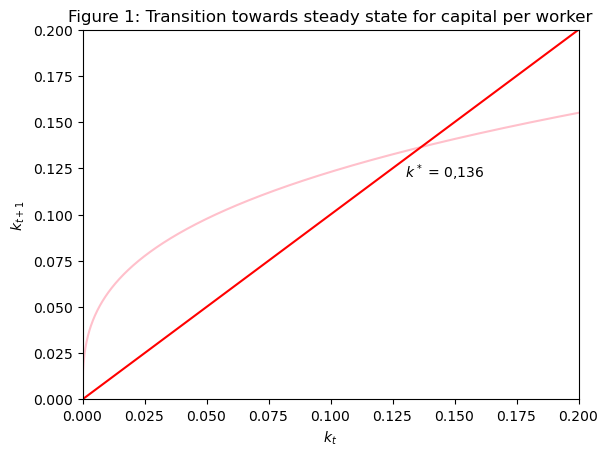

In [108]:
# (i) Defining the transition function
def transition(k_t):  
        return ((k_t ** alpha) * (1 - alpha)) / ((2 + rho) * (1 + n))

# (ii) Defining k_t
k_t = np.linspace(0, 1, 5000)

# (iii) Defining the figure
Figure_ss = plt.figure()
ax = Figure_ss.add_subplot(1, 1, 1)
ax.plot(k_t, transition(k_t), color='pink')
ax.plot(k_t, k_t, color='red')

# (iv) Adjusting the figure
ax.set_xlim([0,0.2])
ax.set_ylim([0,0.2])
ax.set_xlabel('$k_t$')
ax.set_ylabel('$k_{t+1}$')
plt.text(0.13,0.12,'$k^*$ = 0,136')
ax.set_title('Figure 1: Transition towards steady state for capital per worker')


# Conclusion

This paper has solved the OLG model with a fully funded system. From the analytical and nummerical results, the steady state of capital per worker is 0.136, which is illustrated in figure 1.

